In [0]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import neighbors, metrics
import pylab as pl


Se carga el data set

In [0]:
dig = load_digits()

## Sin aplicación de IA

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


<Figure size 432x288 with 0 Axes>

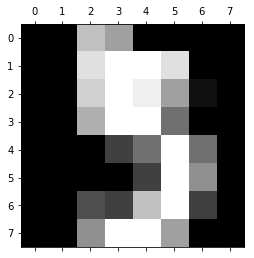

In [26]:
pl.gray() # Queremos las imágenes en grises
prueba = [5]
for i in prueba:
    numero = dig.images[i]
    pl.matshow(numero) # Imprimir una imagen dada
    print(numero) # Ver su representación en pixeles

In [0]:
y = dig.target # el método nos provee las etiquetas de las imágenes en un arreglo
predecidos=0
FP=0
FN=0
VP=0
VN=0

for i in range(len(y)):
    numero = dig.images[i]
    for row in range(len(numero)):
        for col in range(len(numero[row])):
            if numero[row,col] < 10:
                numero[row,col] = 0
    flag=False
    if((numero[2,4]!=0) or (numero[2,5]!=0) or (numero[5,1]!=0) or (numero[5,2]!=0)):
        flag=True
    total = 0
    aciertos = 0
    for row in range(len(numero)):
        for col in range(len(numero[row])):
            if(numero[row,col] > 0):
                total+=1
                if (row == 0) and (col in range(3,6)):
                    aciertos+=1
                elif (row == 1) and (col in range(2,5)):
                    aciertos+=1
                elif (row == 2) and (col in range(2,4)):
                    aciertos+=1
                elif (row == 3 or row == 4) and (col in range(2,6)):
                    aciertos+=1
                elif (row == 5) and (col in range(4,6)):
                    aciertos+=1
                elif (row == 6) and (col in range(3,6)):
                    aciertos+=1
                elif (row == 7) and (col in range(2,5)):
                    aciertos+=1
    porcen=aciertos/total*100
    if((porcen>90) and (flag==False)):
        if(y[i] == 5):
            VP+=1
        else:
            FP+=1
    else:
        if(y[i] == 5):
            FN+=1
        else:
            VN+=1


In [30]:
totales=VP+VN+FP+FN
print("VP: "+str(VP))
print("VN: "+str(VN))
print("Falsos positivos: "+str(FP))
print("Falsos negativos: "+str(FN))
print()
acc=(VP+VN)/(totales)
print("Correctitud(Accuracy): "+str(acc))
print("Error de mala calificación: "+str((FP+FN)/(totales)))
print("Precisión: "+str(VP/(VP+FP)))
recall=VP/(VP+FN)
print("Recall(TPR): "+str(recall))
print("Especificidad(TNR): "+str(VN/(VN+FP)))
print("Valor de predicción negativa(FPR): "+str(VN/(VN+FN)))
f1=2*(acc*recall)/(acc+recall)
print("F1-measure: "+str(f1))
izq=((VP+FP)/totales)*((VP+FN)/totales)
der=((VN+FN)/totales)*((FP+VN)/totales)
AC=izq+der
Kappa=(acc-AC)/(1-AC)
print("Kappa: "+str(Kappa))

VP: 65
VN: 1595
Falsos positivos: 20
Falsos negativos: 117

Correctitud(Accuracy): 0.9237618252643295
Error de mala calificación: 0.07623817473567056
Precisión: 0.7647058823529411
Recall(TPR): 0.35714285714285715
Especificidad(TNR): 0.9876160990712074
Valor de predicción negativa(FPR): 0.9316588785046729
F1-measure: 0.5151280062063616
Kappa: 0.45152263851231694


## Con la aplicación de IA

### KNN

In [36]:
x = np.reshape(dig.images,(len(y),64))
ks=[1,3,5,7,9,11]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y, y_pred))

Con K =  1 , exactitud:  1.0
Con K =  3 , exactitud:  0.9799666110183639
Con K =  5 , exactitud:  0.9760712298274903
Con K =  7 , exactitud:  0.9732888146911519
Con K =  9 , exactitud:  0.9699499165275459
Con K =  11 , exactitud:  0.9671675013912076


### ANN

Los valores objetivos van de 0 a 9. Tiene que convertirse en una representación one-hot, donde la matriz contiene todos los ceros, excepto el índice del valor que representa. Es decir, el valor 4 se representará como [0,0,0,0,1,0,0, 0,0]. Dichos problemas de clasificación multiclase deben traducirse en representaciones únicas debido a la naturaleza de la función de error (https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

In [10]:
onehot_target = pd.get_dummies(dig.target)
onehot_target.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


Se crean los data set para entrenar y evaluar el modelo

In [11]:
dig.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

In [15]:
x_train.shape

(1617, 64)

Se crea la red neuronal

In [0]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


#### Arquitectura de la red:

![texto alternativo](https://miro.medium.com/max/840/1*o7VCg1WILHZMVoPAALKWYg.png)

Resumen del modelo

In [17]:

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)

W0829 06:49:47.815242 139747023583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 06:49:47.833467 139747023583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0829 06:49:48.010564 139747023583104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 06:49:48.127682 139747023583104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Epoch 1/50
1617/1617 [==============================] - 1s 500us/step - loss: 2.0015 - categorical_accuracy: 0.5170
Epoch 2/50
1617/1617 [==============================] - 0s 32us/step - loss: 1.3308 - categorical_accuracy: 0.8472
Epoch 3/50
1617/1617 [==============================] - 0s 30us/step - loss: 0.8535 - categorical_accuracy: 0.9103
Epoch 4/50
1617/1617 [==============================] - 0s 30us/step - loss: 0.5797 - categorical_accuracy: 0.9363
Epoch 5/50
1617/1617 [==============================] - 0s 32us/step - loss: 0.4221 - categorical_accuracy: 0.9505
Epoch 6/50
1617/1617 [==============================] - 0s 36us/step - loss: 0.3226 - categorical_accuracy: 0.9604
Epoch 7/50
1617/1617 [==============================] - 0s 30us/step - loss: 0.2568 - categorical_accuracy: 0.9709
Epoch 8/50
1617/1617 [==============================] - 0s 33us/step - loss: 0.2100 - categorical_accuracy: 0.9716
Epoch 9/50
1617/1617 [==============================] - 0s 37us/step - loss: 0.

In [19]:
scores = model.evaluate(x_val, y_val)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

180/180 [==============================] - 0s 282us/step

categorical_accuracy: 98.33%
